In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
excel = pd.ExcelFile('Coronna Data CERTAIN with KVB edits.xlsx')
df = pd.read_excel(excel, 'BL+3M')

In [7]:
df = df.drop(columns = ['SubjectID', 'CDate', 'Match'])    ### Removing Unique values
df = df.drop(columns = ['SubjectID.1', 'UNMC_id.1', 'CDate.1', 'init_group.1', 'grp.1', 'UNMC_id.2', 'grp.2', 'init_group.2', 'CDate.1', 'futime.1'])    ### Removing Duplicate values
df = df.drop(columns = ['init_group', 'futime'])    ### removing columns which has same values for all rows

In [8]:
df = df.drop(columns = ['statin_use', 'rfstatus_impute', 'ccpstatus_impute', 'statin_use.1', 'smkyrs', 'numcigs'])  ### Dropping columns who have null values greater than 70%

In [9]:
df = df.drop(columns = ['3MResponse','DAS28-CRP BL'])     ### deleting the classification based variables

In [10]:
df = df.rename(columns={"usresultsIgA.1": "usresultsIgA_BL", "usresultsIgG.1": "usresultsIgG_BL", "usresultsIgM.1": "usresultsIgM_BL", 'seatedbp1.1': 'seatedbp1_BL',
                              'seatedbp2.1': 'seatedbp2_BL', 'pres_mtx.1': 'pres_mtx_BL', 'pres_arava.1': 'pres_arava_BL', 'pres_azulfidine.1': 'pres_azulfidine_BL', 
                              'pres_plaquenil.1': 'pres_plaquenil_BL', 'pres_imuran.1': 'pres_imuran_BL', 'pres_minocin.1': 'pres_minocin_BL', 'pres_pred.1': 'pres_pred_BL',
                              'statin_use.1': 'statin_use_BL', 'tender_jts_28.1': 'tender_jts_28_BL', 'BLswollen_jts_28': 'swollen_jts_28_BL',
                              'BLmd_global_assess': 'md_global_assess_BL', 'BLpt_global_assess': 'pt_global_assess_BL', 'BLdi': 'di_BL', 'BLpt_pain': 'pt_pain_BL', 'BLusresultsCRP': 'usresultsCRP_BL',
                              'DAS28-CRP BL': 'DAS28-CRP_BL', })     ### Renaming some columns.

In [11]:
df = df.drop(columns = ['seatedbp1', 'seatedbp2', 'pres_mtx', 'pres_arava', 'pres_azulfidine', 'pres_plaquenil',
                           'pres_pred', 'md_global_assess', 'pt_global_assess', 'di', 'pt_pain', 'usresultsIgA', 
                           'usresultsIgG', 'usresultsIgM'])     ### Droping columns which are collected after 3 months

In [12]:
df = df.drop('UNMC_id',1) 

<ipython-input-12-b440e69117b0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('UNMC_id',1)


In [13]:
final_df = df                                                            ### Label encoding the features that are categorical 
model_label = LabelEncoder()
final_df['grp'] = model_label.fit_transform(final_df['grp'].astype('str'))
final_df['gender'] = model_label.fit_transform(final_df['gender'].astype('str'))
final_df['final_education'] = model_label.fit_transform(final_df['final_education'].astype('str'))
final_df['race_grp'] = model_label.fit_transform(final_df['race_grp'].astype('str'))
final_df['newsmoker'] = model_label.fit_transform(final_df['newsmoker'].astype('str'))
final_df['drinker'] = model_label.fit_transform(final_df['drinker'].astype('str'))
final_df['ara_func_class'] = model_label.fit_transform(final_df['ara_func_class'].astype('str'))

In [14]:
final_df.shape

(296, 64)

In [15]:
cat_var = ['grp', 'gender', 'final_education', 'race_grp', 'newsmoker', 'drinker', 'ara_func_class']
labels = []
for i in final_df.columns:
    if i not in cat_var:
        labels.append(i)
print(labels)
    

['Type I IFN activity', 'IFNβ activity final', 'IFNα activity final', 'IFNβ/α ratio final', 'pres_imuran', 'pres_minocin', 'nonpresNSAIDs_use', 'NSAIDs_use', 'tender_jts_28', 'swollen_jts_28', 'usresultsCRP', 'DAS28-CRP 3m', 'age', 'ethnicity', 'weight', 'height', 'drinksperwk', 'duration_ra', 'num_tnf', 'num_nontnf', 'ndmardused', 'rfstatus_b', 'usresultsRF', 'ccpstatus_b', 'usresultsCCP3', 'hxmi', 'hxunstab_ang', 'hxchf', 'hxother_cv', 'hxtia', 'hxstroke', 'hxcopd', 'hxhtn', 'hxdiabetes', 'hxhld', 'hx_anycancer', 'seatedbp1_BL', 'seatedbp2_BL', 'pres_mtx_BL', 'pres_arava_BL', 'pres_azulfidine_BL', 'pres_plaquenil_BL', 'pres_imuran_BL', 'pres_minocin_BL', 'pres_pred_BL', 'nonpresNSAIDs_use.1', 'NSAIDs_use.1', 'tender_jts_28_BL', 'swollen_jts_28_BL', 'md_global_assess_BL', 'pt_global_assess_BL', 'di_BL', 'pt_pain_BL', 'usresultsCRP_BL', 'usresultsIgA_BL', 'usresultsIgG_BL', 'usresultsIgM_BL']


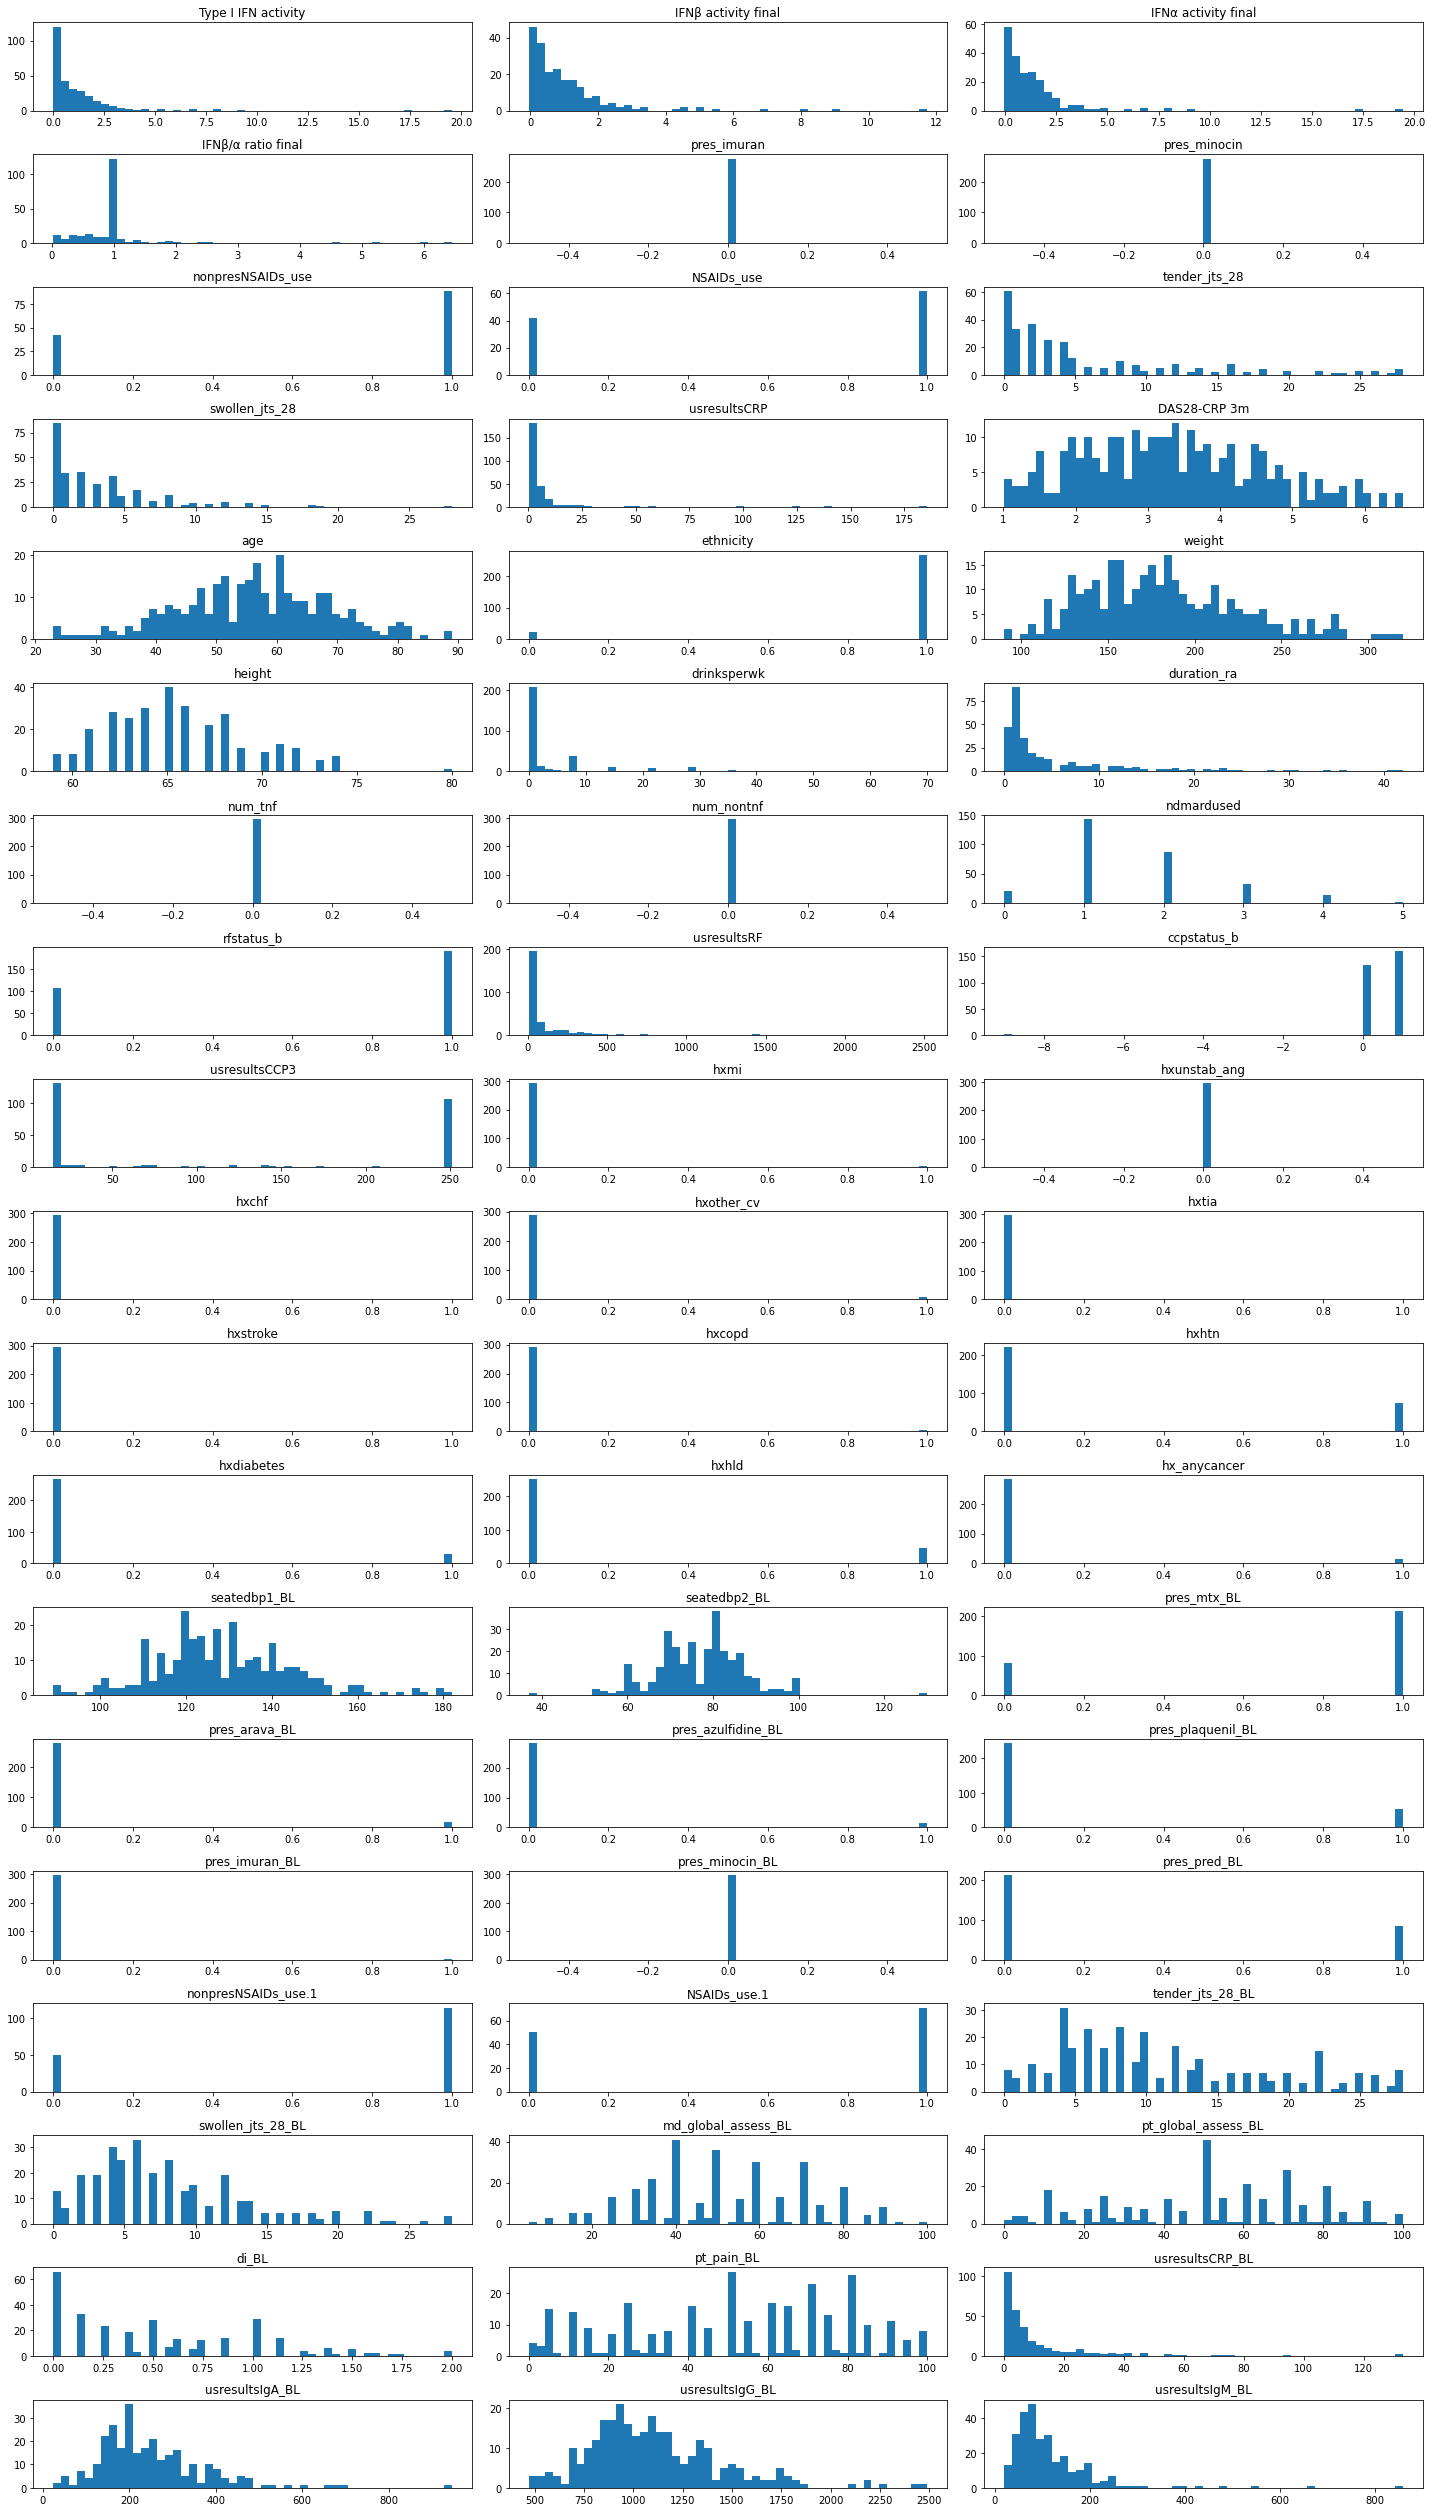

In [19]:

f, axes = plt.subplots(19, 3, figsize=(20,35))
axes = axes.flatten()
for i, ax in enumerate(axes):
    x = np.array(final_df[labels[i]])
    ax.hist(x,bins=50)
    ax.set_title(labels[i])
    f.tight_layout()

<AxesSubplot:>

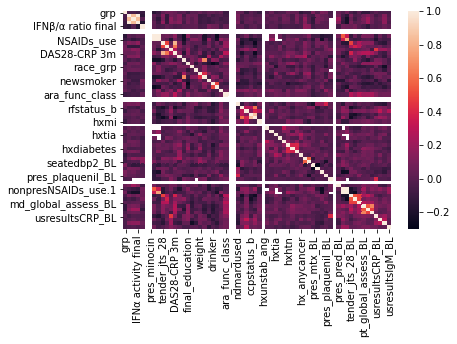

In [21]:
corr = final_df.corr()
sns.heatmap(corr)

In [10]:
final_df.to_csv('initial_preprocessing_reg.csv', index = False)